## Generate shapes from pg_idx

python ./test.py --category Chair --pg_idx 20 --y
20
0 chair    {part_id: 0, group_id: 0 [0], subtree_geo_ids: [0, 1, 2, 3, 4, 5]}
  ├0 chair_back    {part_id: 1, group_id: 0 [0], subtree_geo_ids: [0]}
  |  ├0 back_surface    {part_id: 2, group_id: 0 [0], subtree_geo_ids: [0]}
  |  |  ├0 back_single_surface [LEAF 0] {part_id: 3, group_id: 0 [0], subtree_geo_ids: [0]}
  ├1 chair_arm    {part_id: 4, group_id: 1 [0], subtree_geo_ids: [1]}
  |  ├0 arm_sofa_style [LEAF 1] {part_id: 5, group_id: 0 [0], subtree_geo_ids: [1]}
  ├2 chair_arm    {part_id: 6, group_id: 1 [1], subtree_geo_ids: [2]}
  |  ├0 arm_sofa_style [LEAF 2] {part_id: 7, group_id: 0 [0], subtree_geo_ids: [2]}
  ├3 chair_seat    {part_id: 8, group_id: 2 [0], subtree_geo_ids: [3]}
  |  ├0 seat_surface    {part_id: 9, group_id: 0 [0], subtree_geo_ids: [3]}
  |  |  ├0 seat_single_surface [LEAF 3] {part_id: 10, group_id: 0 [0], subtree_geo_ids: [3]}
  ├4 chair_base    {part_id: 11, group_id: 3 [0], subtree_geo_ids: [4, 5]}
  |  ├0

<IPython.core.display.Javascript object>


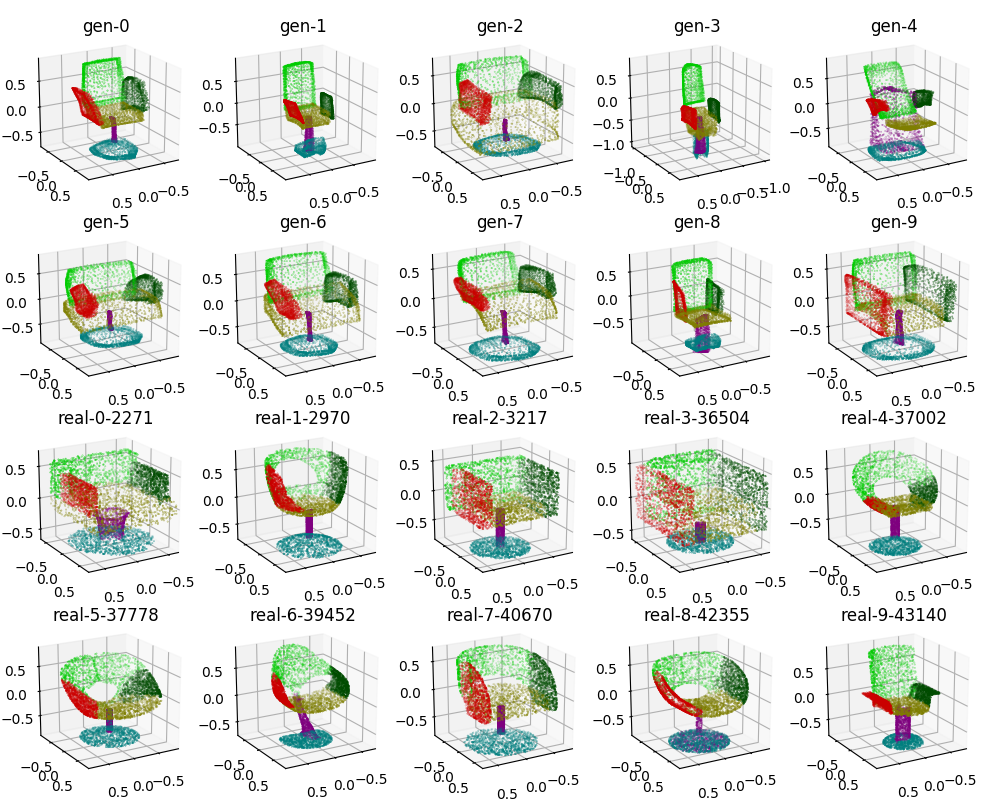

In [8]:
%matplotlib notebook

import os
import torch
import matplotlib
import numpy as np
from utils import render_part_pcs, load_obj
from subprocess import call
from data import Tree

matplotlib.pyplot.ion()

# params
category = 'Chair'
pg_idx = 20

# gen results
cmd = 'python ./test.py --category %s --pg_idx %d --y' % (category, pg_idx)
print(cmd)
call(cmd, shell=True)

out_dir = os.path.join('pretrained_ckpts', 'test-%s-%04d' % (category, pg_idx))
template_fn = os.path.join(out_dir, 'template.json')
pg_template = Tree.load_template(template_fn, torch.device('cpu'))
leaf_ids = pg_template.get_leaf_ids()
pg_template.mark_geo_id({y: x for x, y in enumerate(leaf_ids)})
pg_template.compute_subtree_geo_ids()
print(pg_idx)
print(pg_template)

# visu
pcs_list = []; title_list = [];

# generated
for i in range(10):
    fn = 'generated-%04d' % i
    title_list.append('gen-%d' % i)
    pcs = []
    for part_id in range(len(leaf_ids)):
        pc, _ = load_obj(os.path.join(out_dir, fn, 'part-%02d.obj' % part_id))
        pcs.append(np.expand_dims(pc, axis=0))
    pcs = np.concatenate(pcs, axis=0)
    pcs_list.append(pcs)
    
# real
for i in range(10):
    fn = 'real-%04d' % i
    with open(os.path.join(out_dir, fn + '.txt'), 'r') as fin:
        real_anno_id = fin.readline().rstrip()
    title_list.append('real-%d-%s' % (i, real_anno_id))
    pcs = []
    for part_id in range(len(leaf_ids)):
        pc, _ = load_obj(os.path.join(out_dir, fn, 'part-%02d.obj' % part_id))
        pcs.append(np.expand_dims(pc, axis=0))
    pcs = np.concatenate(pcs, axis=0)
    pcs_list.append(pcs)

render_part_pcs(pcs_list, title_list=title_list, figsize=(10, 8), subplotsize=(4, 5))

## Generate shapes from pg_json

python ./test.py --category Chair --pg_json manual-pt-Chair-sample.json --y
manual-pt-Chair-sample.json
0 chair    {part_id: 0, group_id: 0 [0], subtree_geo_ids: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
  ├0 chair_back    {part_id: 1, group_id: 0 [0], subtree_geo_ids: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}
  |  ├0 back_surface    {part_id: 2, group_id: 0 [0], subtree_geo_ids: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}
  |  |  ├0 back_single_surface [LEAF 0] {part_id: 3, group_id: 0 [0], subtree_geo_ids: [0]}
  |  |  ├1 back_surface_vertical_bar [LEAF 1] {part_id: 4, group_id: 1 [0], subtree_geo_ids: [1]}
  |  |  ├2 back_surface_vertical_bar [LEAF 2] {part_id: 5, group_id: 1 [1], subtree_geo_ids: [2]}
  |  |  ├3 back_surface_vertical_bar [LEAF 3] {part_id: 6, group_id: 1 [2], subtree_geo_ids: [3]}
  |  |  ├4 back_surface_vertical_bar [LEAF 4] {part_id: 16, group_id: 1 [3], subtree_geo_ids: [4]}
  |  |  ├5 back_surface_vertical_bar [LEAF 5] {part_id: 17, group_id: 1 [4], subtree_geo_ids: [5]}
 

<IPython.core.display.Javascript object>


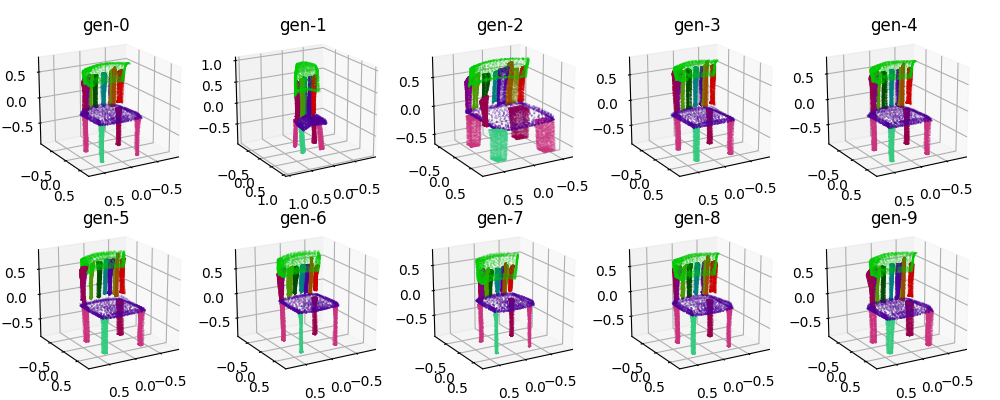

In [9]:
%matplotlib notebook

import os
import torch
import matplotlib
import numpy as np
from utils import render_part_pcs, load_obj
from subprocess import call
from data import Tree

matplotlib.pyplot.ion()

# params
category = 'Chair'
pg_json = 'manual-pt-Chair-sample.json'

# gen results
cmd = 'python ./test.py --category %s --pg_json %s --y' % (category, pg_json)
print(cmd)
call(cmd, shell=True)

out_dir = os.path.join('pretrained_ckpts', 'test-%s-%s' % (category, pg_json.split('/')[-1].split('.')[0]))
template_fn = os.path.join(out_dir, 'template.json')
pg_template = Tree.load_template(template_fn, torch.device('cpu'))
leaf_ids = pg_template.get_leaf_ids()
pg_template.mark_geo_id({y: x for x, y in enumerate(leaf_ids)})
pg_template.compute_subtree_geo_ids()
print(pg_json)
print(pg_template)

# visu
pcs_list = []; title_list = [];

# generated
for i in range(10):
    fn = 'generated-%04d' % i
    title_list.append('gen-%d' % i)
    pcs = []
    for part_id in range(len(leaf_ids)):
        pc, _ = load_obj(os.path.join(out_dir, fn, 'part-%02d.obj' % part_id))
        pcs.append(np.expand_dims(pc, axis=0))
    pcs = np.concatenate(pcs, axis=0)
    pcs_list.append(pcs)

render_part_pcs(pcs_list, title_list=title_list, figsize=(10, 4), subplotsize=(2, 5))